# Introduction to Decision Theory using Probabilistic Graphical Models

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/b/bb/Risk_aversion_curve.jpg" width="400px" height="300px" />

> So far, we have seen that probabilistic graphical models are useful for modeling situations that involve uncertainty. Furthermore, we will see in the next module how using inference algorithms we will also reach conclusions abount the current situation from partial evidence: predictions.
> 
> On the other hand, we do not only want to obtain these conclusions (predictions), but actually make decisions on top of these conclusions.
>
> It turns out that we can actually use probabilistic graphical models to encode not only the uncertain situations, but also the decision making agents with all the policies they are allowed to implement and the possible utilities that one may obtain.

> **Objetives:**
> - To learn how to represent decision situations using PGMs.
> - To understand the maximum expected utility principle.
> - To learn how to measure the value of information when making a decision.

> **References:**
> - Probabilistic Graphical Models: Principles and Techniques, By Daphne Koller and Nir Friedman. Ch. 22 - 23.
> - Probabilistic Graphical Models Specialization, offered through Coursera. Prof. Daphne Koller.


<p style="text-align:right;"> Imagen recuperada de: https://upload.wikimedia.org/wikipedia/commons/b/bb/Risk_aversion_curve.jpg.</p>

___

# 1. Maximizing Expected Utility

The theoretical foundations of decision theory were established long befor probabilistic graphical models came to live. The framework of *maximum expected utility* allows to formulate and solve decision problems that involve uncertainty.

Before continuing, we should be clear that the **utility** is a numerical function that assigns numbers to the various possible outcomes, encoding the preferences of the agent. These numbers:

- Do not have meanings in themselves.
- We only know that the larger, the better, according to the preferences of the agent.
- Usually, we compare the utility of two outcomes by means of the $\Delta U$, which represents the strength of the "happiness" change from an outcome w.r.t. the other.

The outcomes we were talking about above can vary along *multiple dimensions*. One of those dimensions is often the monetary gain, but most of the settings consider other dimensions as well.

## 1.1. Problem formulation and maximum expected utility principle

A simple **decision making situation** $\mathcal{D}$ is defined by:

- A set of possible actions $A$, with $\mathrm{Val}(A)=\{a_1, \dots, a_k\}$.
- A set of possible states (RVs) $\bar{X}$, with $\mathrm{Val}(\bar{X})=\{\bar{x}_1, \dots, \bar{x}_n\}$.
- A conditional distribution $P(\bar{X}|A)$.
- A utility function $U(\bar{X}, A)$, which expresses the agent's preferences.

The **expected utility** on the above decision making situation, given that $A=a$,  is

$$EU[\mathcal{D}[a]] = \sum_{\bar{X}}P(\bar{X}|a)U(\bar{X},a).$$

Furthermore, the **maximum expected utility (MEU)** principle states that we should choose the action that maximizes the expected utility

$$a^\ast = \arg\max_{a\in\mathrm{Val}(A)} EU[\mathcal{D}[a]].$$

**How can we represent the above using PGMs?**

We can use the ideas we developed for PGMs to represent the decision making situations in a very interpretable way.

In this sense, we have:
- Random variables are represented by *ovals* and stand for the state.
- Actions are represented by *rectangles*.
- Utilities are represented by *diamonds*. These have no children.

**Example.** Consider the decision situation $\mathcal{D}$ where a graduate of the Master's Degree in Data Science is deciding whether to found a Data Science consultancy company or not.

While this person does not exactly know which will be the demand of consultancy services, he/she knows that the demand will be either:
- $m^0$: nonexistent, with probability $0.5$;
- $m^1$: moderate, with probability $0.3$;
- $m^2$: high, with probability $0.2$.

Moreover, he/she will obtain a utility $U(M, f^0)=0$ for $M=m^0, m^1, m^2$ in the case that he/she doesn't found the company, or the following utilities in the case that he/she found the company:
- $U(m^0, f^1)=-7$;
- $U(m^1, f^1)=5$;
- $U(m^2, f^1)=20$.

Let's represent the graphical model corresponding to this situation:

In [1]:
from IPython.display import Image

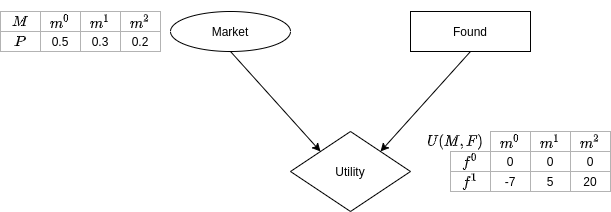

In [2]:
# First draw in the white board, then show (first_representation)
Image("figures/first_representation.png")

Then, according to this:

- What are the expected utilities for each action?
  - $E[\mathcal{D}[f^0]]=0$
  - $E[\mathcal{D}[f^1]]=0.5 \times -7 + 0.3 \times 5 + 0.2 \times 20=2.$
  
- Which is the optimal action?
  - $f^1 = \arg \max_{f=f^0, f^1} E[\mathcal{D}[f]]$.

With `pgmpy`:

In [3]:
# Import pgmpy.factors.discrete.DiscreteFactor
from pgmpy.factors.discrete import DiscreteFactor

In [4]:
# Define factors P(M), U(M,F)
P_M = DiscreteFactor(variables=["M"],
                     cardinality=[3],
                     values=[0.5, 0.3, 0.2])
U_MF = DiscreteFactor(variables=["M", "F"],
                      cardinality=[3, 2],
                      values=[0, -7, 0, 5, 0, 20])

In [5]:
print(P_M)

+------+----------+
| M    |   phi(M) |
+======+==========+
| M(0) |   0.5000 |
+------+----------+
| M(1) |   0.3000 |
+------+----------+
| M(2) |   0.2000 |
+------+----------+


In [6]:
print(U_MF)

+------+------+------------+
| M    | F    |   phi(M,F) |
+======+======+============+
| M(0) | F(0) |     0.0000 |
+------+------+------------+
| M(0) | F(1) |    -7.0000 |
+------+------+------------+
| M(1) | F(0) |     0.0000 |
+------+------+------------+
| M(1) | F(1) |     5.0000 |
+------+------+------------+
| M(2) | F(0) |     0.0000 |
+------+------+------------+
| M(2) | F(1) |    20.0000 |
+------+------+------------+


In [7]:
# Find Expected Utility
EU = (P_M * U_MF).marginalize(variables=["M"],
                              inplace=False)

In [9]:
print(EU)

+------+----------+
| F    |   phi(F) |
+======+==========+
| F(0) |   0.0000 |
+------+----------+
| F(1) |   2.0000 |
+------+----------+


**Multiple utility nodes**

In the above example, we only had one utility node. However, we may include as many utility nodes as wanted to reduce the number of parameters:

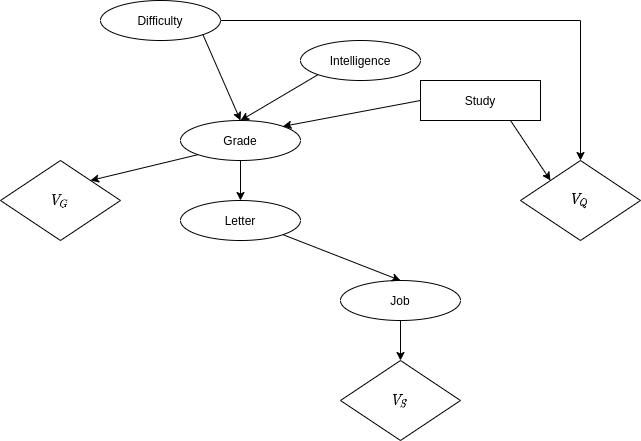

In [10]:
Image("figures/student_utility.png")

Where:
- $V_G$: Happiness with the grade itself.
- $V_Q$: Quality of life during studies.
- $V_S$: Value of getting a good job.

The total utility can be formulated as:

$$U=V_G+V_Q+V_S.$$

*Question.* If $|\mathrm{Val}(D)| = 2$, $|\mathrm{Val}(S)| = 2$, $|\mathrm{Val}(G)| = 3$, and $|\mathrm{Val}(J)| = 2$, how many parameters do you need to completely specify the utility?

- $|\mathrm{Val}(V_G)| = 3$; $|\mathrm{Val}(V_Q)| = 4$; $|\mathrm{Val}(V_S)| = 2$. We need $3+4+2=9$ parameters.

*Question.* How many if the utility weren't decomposed?

- $3\times 2 \times 2 \times 2 = 24$.

## 1.2. Information edges and decision rules

The influence diagrams we have depicted above, also allow us to capture the notion of information available to the agent when they make their decision.

**Example.** In the example of the Master's graduate deciding founding or not founding his company, let's assume that he/she has the opportunity to carry out a survey to measure the overall market demand for Data Science consultancy before making the decision.

In this sense, the graph now looks like the following:

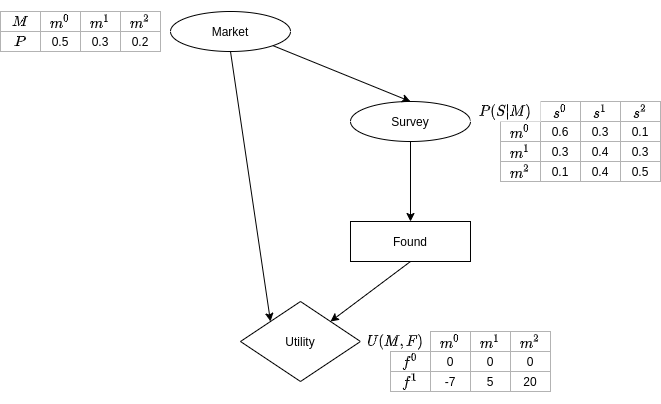

In [11]:
# First draw in the white board, then show (second_representation)
Image("figures/second_representation.png")

Hence, the agent can make its decision depending on the value of the survey, which is denoted by the precense of the edge.

Formally,

> *Definition.* A **decision rule** $\delta_A$ at an action node $A$ is a conditional probability $P(A|\mathrm{Pa}A)$ (a function that maps each instatiation of $\mathrm{Pa}A$  to a probability distribution $\delta_A$ over $\mathrm{Val}(A)$).

Given the above, **what is the expected utility with information?**

Following the same sort of ideas we get that

$$EU[\mathcal{D}[\delta_A]] = \sum_{\bar{X}, A}P_{\delta_A}(\bar{X},A)U(\bar{X},A),$$

where $P_{\delta_A}(\bar{X},A)$ is the joint probability distribution over $\bar{X}$ and $A$. The subindex $\delta_A$ makes reference that this joind distribution depends on the selection of the decision rule $\delta_A$.

Now, following the MEU, the optimal decision rule is:

$$\delta_A^\ast = \arg \max_{\delta_A} EU[\mathcal{D}[\delta_A]],$$

and the MEU is

$$MEU(\mathcal{D}) = \max_{\delta_A} EU[\mathcal{D}[\delta_A]].$$

**How can we find optimal decision rules?**

In our entrepreneur example, we have that 

\begin{align}
EU[\mathcal{D}[\delta_A]] &= \sum_{\bar{X}, A}P_{\delta_A}(\bar{X},A)U(\bar{X},A) \\
& = \sum_{M,S,F} P(M)P(S|M) \delta_F(F|S) U(M,F)\\
& = \sum_{S,F} \delta_F(F|S) \sum_M P(M)P(S|M)U(M,F)\\
& = \sum_{S,F} \delta_F(F|S) \mu(S,F)
\end{align}

(see in the whiteboard, then show equations)

Thus, let's calculate $\mu(S,F)$ using `pgmpy`:

In [12]:
print(P_M), print(U_MF)

+------+----------+
| M    |   phi(M) |
+======+==========+
| M(0) |   0.5000 |
+------+----------+
| M(1) |   0.3000 |
+------+----------+
| M(2) |   0.2000 |
+------+----------+
+------+------+------------+
| M    | F    |   phi(M,F) |
+======+======+============+
| M(0) | F(0) |     0.0000 |
+------+------+------------+
| M(0) | F(1) |    -7.0000 |
+------+------+------------+
| M(1) | F(0) |     0.0000 |
+------+------+------------+
| M(1) | F(1) |     5.0000 |
+------+------+------------+
| M(2) | F(0) |     0.0000 |
+------+------+------------+
| M(2) | F(1) |    20.0000 |
+------+------+------------+


(None, None)

In [13]:
# We already have P(M), and U(F,M). Define P(S|M)
P_S_given_M = DiscreteFactor(variables=["S", "M"],
                             cardinality=[3, 3],
                             values=[0.6, 0.3, 0.1, 0.3, 0.4, 0.4, 0.1, 0.3, 0.5])

In [14]:
# Compute mu(F,S)
mu_FS = (P_M * P_S_given_M * U_MF).marginalize(variables=["M"], inplace=False)

In [15]:
# Print mu(F,S)
print(mu_FS)

+------+------+------------+
| S    | F    |   phi(S,F) |
+======+======+============+
| S(0) | F(0) |     0.0000 |
+------+------+------------+
| S(0) | F(1) |    -1.2500 |
+------+------+------------+
| S(1) | F(0) |     0.0000 |
+------+------+------------+
| S(1) | F(1) |     1.1500 |
+------+------+------------+
| S(2) | F(0) |     0.0000 |
+------+------+------------+
| S(2) | F(1) |     2.1000 |
+------+------+------------+


Following the MEU principle, we should select for each state (the Survey, in this case) the action that maximizes $\mu$.

In this case:

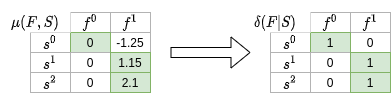

In [16]:
Image("figures/table.png")

Finally,

$$MEU[\mathcal{D}] = \sum_{S,F} \delta_F^\ast(F|S) \mu(S,F) = 0 + 1.15 + 2.1 = 3.25$$

In [24]:
print(mu_FS)

+------+------+------------+
| S    | F    |   phi(S,F) |
+======+======+============+
| S(0) | F(0) |     0.0000 |
+------+------+------------+
| S(0) | F(1) |    -1.2500 |
+------+------+------------+
| S(1) | F(0) |     0.0000 |
+------+------+------------+
| S(1) | F(1) |     1.1500 |
+------+------+------------+
| S(2) | F(0) |     0.0000 |
+------+------+------------+
| S(2) | F(1) |     2.1000 |
+------+------+------------+


In [23]:
print(mu_FS.maximize(variables=["F"], inplace=False))

+------+----------+
| S    |   phi(S) |
+======+==========+
| S(0) |   0.0000 |
+------+----------+
| S(1) |   1.1500 |
+------+----------+
| S(2) |   2.1000 |
+------+----------+


In [17]:
# Define optimal decision rule
delta_F_given_S = DiscreteFactor(variables=["F", "S"],
                                 cardinality=[2, 3],
                                 values=[1, 0, 0, 0, 1, 1])

In [18]:
print(delta_F_given_S)

+------+------+------------+
| F    | S    |   phi(F,S) |
+======+======+============+
| F(0) | S(0) |     1.0000 |
+------+------+------------+
| F(0) | S(1) |     0.0000 |
+------+------+------------+
| F(0) | S(2) |     0.0000 |
+------+------+------------+
| F(1) | S(0) |     0.0000 |
+------+------+------------+
| F(1) | S(1) |     1.0000 |
+------+------+------------+
| F(1) | S(2) |     1.0000 |
+------+------+------------+


In [19]:
# Obtain MEU
MEU = (delta_F_given_S * mu_FS).marginalize(variables=["F", "S"], inplace=False)
print(MEU)

+---------+
|   phi() |
+=========+
|  3.2500 |
+---------+


Without this observation the MEU was 2, and now the MEU has increased more than 50%.

Nice, huh?

___
# 2. Utility functions


## 2.1. Utility of money
We have used utility functions in all the first section assuming that they were known. In this section we study these functions in more detail.

**Utility functions** are a necessary tool that enables us to compare complex scenarios that involve uncertainty or risk.

The first thing that we should understand is that utility is not the same as expected payoff.

**Example.** An investor must decide between a participation in company A, where he would earn $\$3$ million without risk, and a participation in company B, where he would earn $\$4$ million with probability 0.8 and $\$0$ with probability 0.2.

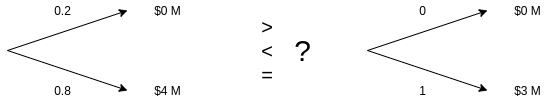

In [25]:
Image("figures/utility_first.png")

Which one do you prefer?
  - The risk-free one.

What is the expected payof of the company A?
  - $\$3$ M.
  
What is the expected payoff of the company B?
  - $0.8 \times \$4$ M + $0.2 \times \$0$ M = $\$3.2$ M.

**Example.**

Another common example that reflects this fact is the well-known St. Petersburg Paradox:

- A fair coin is tossed repeatedly until it comes up Heads.
- Each toss that it doesn't come up Heads, the payoff is doubled.
- In this sense, if the coin comes up Heads in the $n$-th toss, then the payoff will be $\$2^n$.

How much are you willing to pay to enter to this game?
- 20, 10, 1, 5.

What happens is that if we compute the expected payoff it is:

- $P(\text{comes up Heads in } n-\text{th toss}) = \frac{1}{2^n}$

$$E[\text{Payoff}] = \sum_{n=1}^{\infty}P(\text{comes up Heads in } n-\text{th toss}) \text{Payoff}(n) = \sum_{n=1}^{\infty} \frac{1}{2^n} 2^n = \sum_{n=1}^{\infty} 1 = \infty.$$

With these two examples, we have shown that almost always people do not always choose to maximize their monetary gain. What this implies is that the utility of money is not the money itself.

In fact, at this point of the history and after several psychological studies, we know that utility functions of money for most people look like

$$U(W) = \alpha + \beta \log(W + \gamma),$$

which is a nice *concave* function.

**How does this function look like?** (see in the whiteboard).

**How does the actual form of the curve have to be the attitude towards risk?**

## 2.2. Utility of multiple attributes

All the attributes affecting the utility must be integrated into one utility function.

This may be a difficult task, since we can enter into some complex fields, far beyond math, probability, and graphs.

- For instance, how do we compare human life with money?
  - A low cost airline is considering the decision of not to run mainteinance plans over the aircraft at every arrival.
  - If you have car, you don't change the tires that often (every 3 months).
  
There have been several attempts to addres this problem:
  - Micromorts: $\frac{1}{10^6}$ chance of death.
  - [QALY](https://en.wikipedia.org/wiki/Quality-adjusted_life_year).

# 3. Value of perfect information

We used influence diagrams to make decisions given a set of observations.

Another type of question that may arise is **which observations sould I make before making a decision?**.

- Initially one may think that the more information, the better (because information is power).
- But the answer to this question is far from being that simple.

For instance:

- In our entrepreneur example, we saw that including the information of the survey increased the MEU significatively. However, we did not take into account the costs of performing that survey. What if the cost of performing that survey makes the money gains of the company negative or too little?

- Medical diagnosis relies on tests. Some of these tests are painful, risky and/or very expensive.

A notion that allows us to adress this question is the **Value of Perfect Information**.

- The value of perfect information $\mathrm{VPI}(A|\bar{X})$ is the value (in utility units) of observing $\bar{X}$ before choosing an action at the node $A$.

- If $\mathcal{D}$ is the original influence diagram, and

- $\mathcal{D}_{\bar{X}\to A}$ is the influence diagram with the edge(s) $\bar{X}\to A$, 

- then

  $$\mathrm{VPI}(A|\bar{X}) = MEU(\mathcal{D}_{\bar{X}\to A}) - MEU(\mathcal{D}).$$

In the entrepreneur example,

$$\mathrm{VPI}(F|S) = MEU(\mathcal{D}_{S\to F}) - MEU(\mathcal{D})=3.25 - 2 = 1.25.$$

> *Theorem.* The value of perfect information satisfies:
>
> (i) $\mathrm{VPI}(A|\bar{X})\geq 0$.
> 
> (ii) $\mathrm{VPI}(A|\bar{X})= 0$ if and only if the optimal decision rule for $\mathcal{D}$ is also optimal for  $\mathcal{D}_{\bar{X}\to A}$.

This theorem practically says that the information is valuable if and only if it changes the agent's decision at least in one case.

**Example.** Consider the case that you are interested in two job offers in two different companies. Furthermore, these two companies are startups and both are looking for funding, which highly depends on the organizational quality of the company.

This situation can be modeled as:

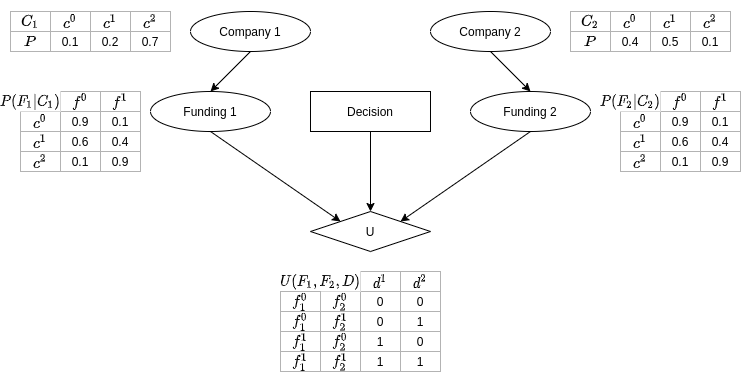

In [26]:
Image("figures/vpi.png")

Let's find the MEU using `pgmpy`:

In [28]:
# Define factors
P_C1 = DiscreteFactor(variables=["C1"],
                      cardinality=[3],
                      values=[0.1, 0.2, 0.7])
P_C2 = DiscreteFactor(variables=["C2"],
                      cardinality=[3],
                      values=[0.4, 0.5, 0.1])
P_F1_given_C1 = DiscreteFactor(variables=["F1", "C1"],
                               cardinality=[2, 3],
                               values=[0.9, 0.6, 0.1, 0.1, 0.4, 0.9])
P_F2_given_C2 = DiscreteFactor(variables=["F2", "C2"],
                               cardinality=[2, 3],
                               values=[0.9, 0.6, 0.1, 0.1, 0.4, 0.9])
U_F1F2D = DiscreteFactor(variables=["F1", "F2", "D"],
                         cardinality=[2, 2, 2],
                         values=[0, 0, 0, 1, 1, 0, 1, 1])

In [29]:
# Obtain Expected utility
EU = (P_C1 * P_C2 * P_F1_given_C1 * P_F2_given_C2 * U_F1F2D).marginalize(variables=[
    "C1", "C2", "F1", "F2"], inplace=False)

In [30]:
# Print EU
print(EU)

+------+----------+
| D    |   phi(D) |
+======+==========+
| D(0) |   0.7200 |
+------+----------+
| D(1) |   0.3300 |
+------+----------+


In [31]:
# Obtain MEU(D)
MEU = EU.maximize(variables=["D"], inplace=False)
print(MEU)

+---------+
|   phi() |
+=========+
|  0.7200 |
+---------+


Now, let's say that a friend of yours already works in the Company 2, so he informs you about the organizational status of that company. What is the value of that information?

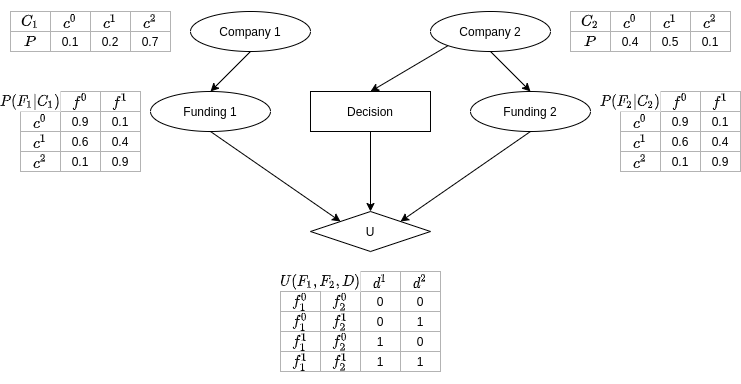

In [32]:
Image("figures/vpi2.png")

In [33]:
# Obtain the factor mu(D, C2)
mu_DC2 = (P_C1 * P_C2 * P_F1_given_C1 * P_F2_given_C2 * U_F1F2D).marginalize(
    variables=["C1", "F1", "F2"], inplace=False
)

In [34]:
# Print
print(mu_DC2)

+-------+------+-------------+
| C2    | D    |   phi(C2,D) |
+=======+======+=============+
| C2(0) | D(0) |      0.2880 |
+-------+------+-------------+
| C2(0) | D(1) |      0.0400 |
+-------+------+-------------+
| C2(1) | D(0) |      0.3600 |
+-------+------+-------------+
| C2(1) | D(1) |      0.2000 |
+-------+------+-------------+
| C2(2) | D(0) |      0.0720 |
+-------+------+-------------+
| C2(2) | D(1) |      0.0900 |
+-------+------+-------------+


In [43]:
# Select optimal decision
delta_D_given_C2 = DiscreteFactor(variables=["C2", "D"],
                                  cardinality=[3, 2],
                                  values=[1, 0, 1, 0, 0, 1])

In [44]:
print(delta_D_given_C2)

+-------+------+-------------+
| C2    | D    |   phi(C2,D) |
+=======+======+=============+
| C2(0) | D(0) |      1.0000 |
+-------+------+-------------+
| C2(0) | D(1) |      0.0000 |
+-------+------+-------------+
| C2(1) | D(0) |      1.0000 |
+-------+------+-------------+
| C2(1) | D(1) |      0.0000 |
+-------+------+-------------+
| C2(2) | D(0) |      0.0000 |
+-------+------+-------------+
| C2(2) | D(1) |      1.0000 |
+-------+------+-------------+


In [45]:
# Obtain MEU(D_C2->D)
MEU_ = (delta_D_given_C2 * mu_DC2).marginalize(variables=["D", "C2"], inplace=False)

In [46]:
print(MEU_)

+---------+
|   phi() |
+=========+
|  0.7380 |
+---------+


In [47]:
# Obtain VPI
VPI = MEU_.values - MEU.values
VPI

0.018000000000000016

# Announcements

## Exam of module 1.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>